This is the setup for a standard MRF with inference

Things to discuss:

1. Type of factor: Discrete vs. Continuous 
2. Type of inference: Variable Elimination vs. Belief Propogation
3. How to calculate phi using co-occurrences?

In [129]:
import numpy as np
import pandas as pd
from pgmpy.models import MarkovNetwork
from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.inference import VariableElimination, BeliefPropagation
import daft
import random

In [130]:

#instantiate network
G = MarkovNetwork()

#create graph (add nodes and edges)
nodes = ['w1', 'w2', 'w3', 'w4']
edges = [('w1','w2'),('w1','w3'),('w1','w4'),('w2','w3'),('w2','w4'),('w3','w4')]

G.add_nodes_from(nodes)
G.add_edges_from(edges)

<Axes:>

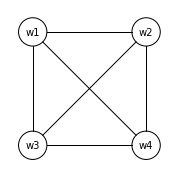

In [131]:
pgm = daft.PGM(node_unit=1, grid_unit=4, directed=False)

x = [0, 1, 0, 1]
y = [1, 1, 0, 0]

for i in range(len(nodes)):
    pgm.add_node(nodes[i], nodes[i], x[i], y[i])
    
for i in range(len(edges)):    
    pgm.add_edge(edges[i][0],edges[i][1])
    
pgm.render()

In [132]:
#create factors
phi = [DiscreteFactor(edge, [2, 2], np.random.rand(4)) for edge in G.edges()]
G.add_factors(*phi)

In [135]:
#inference
G_infer = BeliefPropagation(G)
G_prob = G_infer.query(variables=['w1'], evidence={'w2': 0, 'w3': 0, 'w4': 0})
print(G_prob)

0it [00:00, ?it/s]

+-------+-----------+
| w1    |   phi(w1) |
+=======+===========+
| w1(0) |    0.3163 |
+-------+-----------+
| w1(1) |    0.6837 |
+-------+-----------+


w1 w2
0  0 = ?
0  1 = ?
1  0 = ?
1  1 = co-occurrence probability 